In [1]:
from class_polar import *
from monte_carlo_funcs import *
from sqGKP_funcs import *
from helper_funcs import *
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 60
plt.rcParams['legend.fontsize'] = 40
plt.rcParams['font.family'] = 'serif'

plt.rcParams['axes.linewidth'] = 2
plt.rcParams['mathtext.fontset'] = 'stix'

In [2]:
def pus(ums,d,sig,l_cutoff=20):
    u_list = np.array(range(-l_cutoff*d, l_cutoff*d + 1, d)) + ums*d
    log_numer = scipy.special.logsumexp(-((u_list*np.sqrt(2*np.pi/d))**2)/(2*sig*sig))
    return np.exp(log_numer)/(np.sqrt(d)*sig)

def pus_lim(ums,d,sig):
    return np.exp(-np.pi*d*((ums/sig)**2))/(np.sqrt(d)*sig)

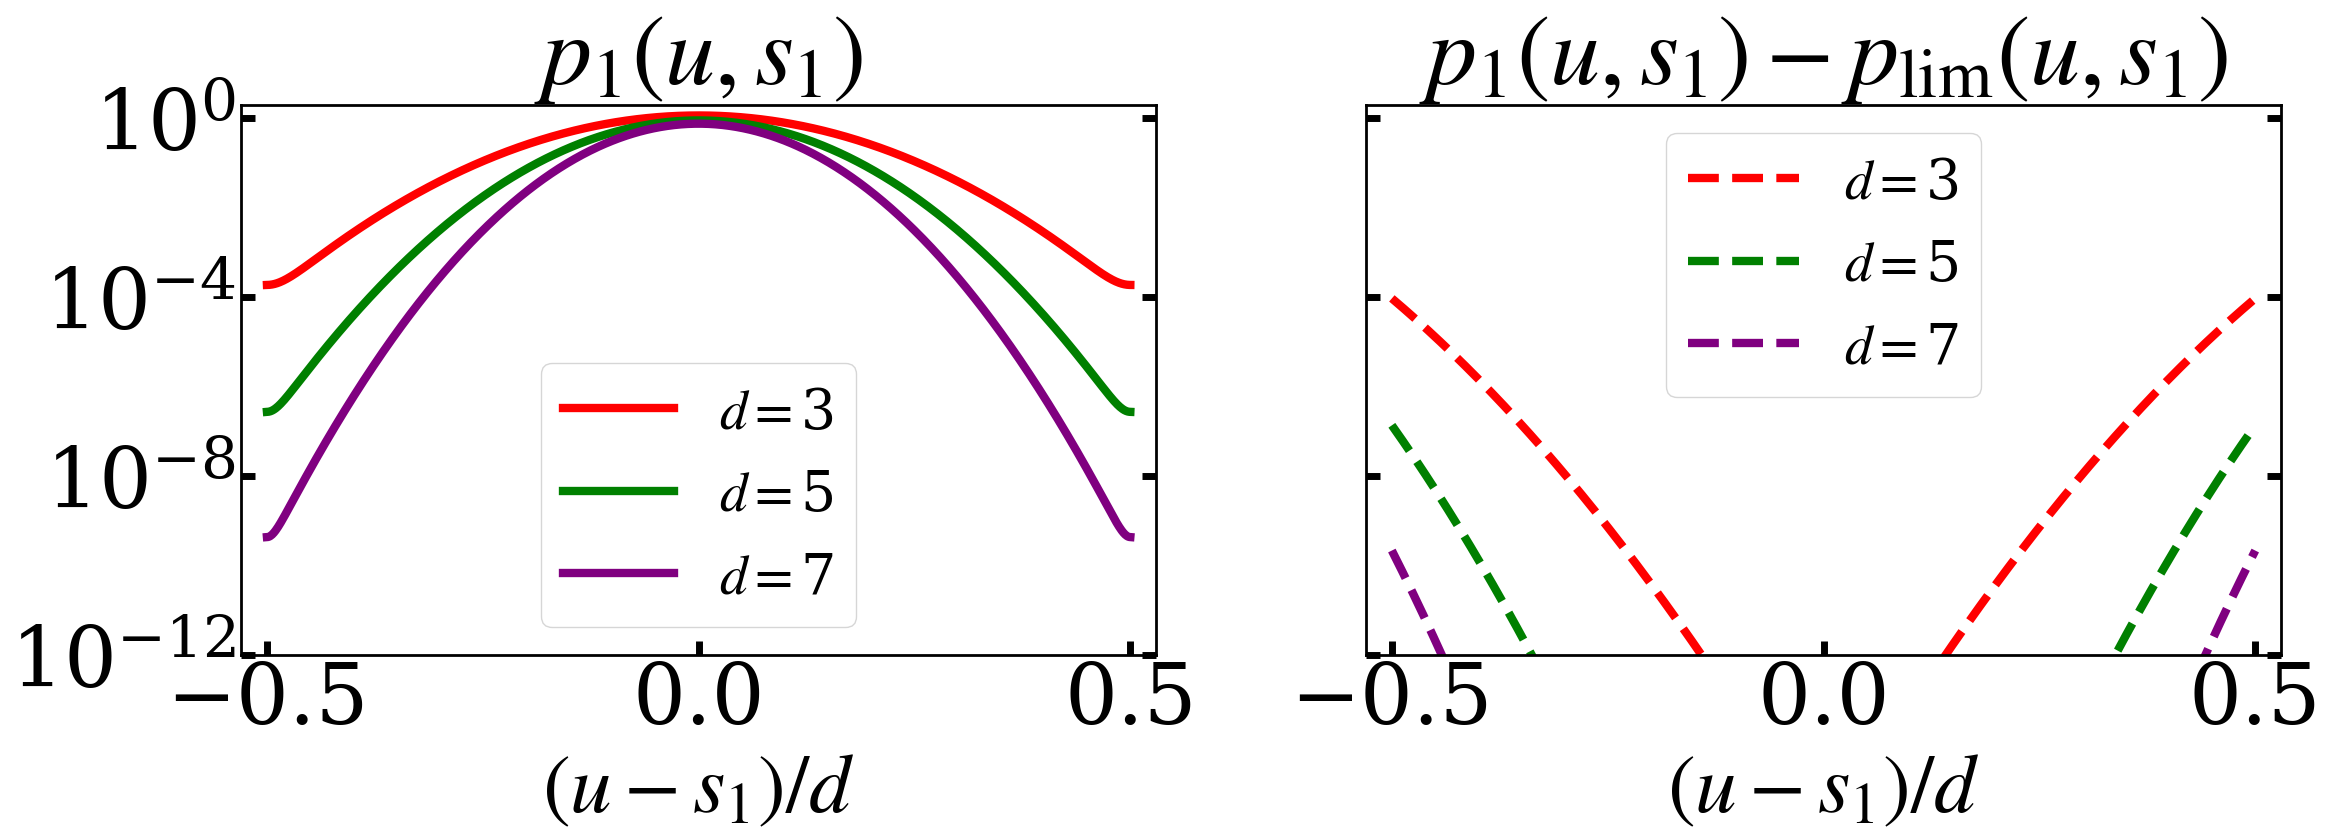

In [3]:
colors = ['goldenrod','red','green','purple']
ds = [2,3,5,7,11,13,17]
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(24, 10))

ums = np.linspace(-1/2,1/2,1000)
for i in range(1,4):
    pus_list = np.array([pus(u,ds[i],0.5) for u in ums])
    pus_lim_list = pus_lim(ums,ds[i],0.5)
    ax1.plot(ums,pus_list,linewidth=6,color=colors[i],label='$d = $'+str(ds[i]))
    ax2.plot(ums,pus_list-pus_lim_list,linestyle='dashed',linewidth=6,color=colors[i],label='$d = $'+str(ds[i]))


ax1.set_title(r'$p_1(u,s_1)$')
ax2.set_title(r'$p_1(u,s_1) - p_{\mathrm{lim}}(u,s_1)$')
ax1.set_xlabel(r'$(u-s_1)/d$')
ax2.set_xlabel(r'$(u-s_1)/d$')
ax1.set_xlim(-0.53,0.53)
ax2.set_xlim(-0.53,0.53)
ax1.set_ylim(1e-12,2)
ax1.yaxis.set_tick_params(labelleft=True)
#ax2.yaxis.set_tick_params(labelright=True)
ax1.tick_params(axis='y', direction='in',width=5,length=10,right=True)
ax1.tick_params(axis='x', direction='in',width=5,length=10)
ax2.tick_params(axis='y', direction='in',width=5,length=10,right=True)
ax2.tick_params(axis='x', direction='in',width=5,length=10)
plt.tight_layout()
ax1.legend()
ax2.legend()

plt.yscale('log')

In [ ]:
# Data generation cell (do not run this cell if you just want to plot the results)
sig1 = np.linspace(0.1,0.62,1000)

I_no_analog_sq  = []
for d in range(2,10):
    all_p_list = np.array([[scipy.integrate.quad(pu_integrand,
            -1/np.sqrt(4*d/(2*np.pi)),1/np.sqrt(4*d/(2*np.pi)),args=(s,i,d))[0] 
            for s in sig1] for i in range(d)])
    I_no_analog_sq.append(np.log2(d) + 2*np.sum(all_p_list*np.log2(all_p_list),axis=0))
I_no_analog_sq = np.array(I_no_analog_sq )
np.save('I_no_analog_sq_d_2-17.npy',I_no_analog_sq)

I_analog_sq = []
for d in [2,3,5,7,11,13,17]:
    I_analog_sq.append(np.array([np.log2(d) - 2*scipy.integrate.quad(Hp_integrand,-1/np.sqrt(4*d),1/np.sqrt(4*d),args=(s,d))[0] for s in sig1]))
I_analog_sq = np.array(I_analog_sq)
np.save('I_analog_sq_d_2-17.npy',I_analog_sq)

I_analog_hexd2 = np.array([np.log2(2) + scipy.integrate.dblquad(Hp_hex_integrand,-0.5,0.5,lambda x: -0.5,lambda x:0.5, args=(s,2))[0] for s in np.linspace(0.32,0.62,1000)])
np.save('I_analog_hexd2_0.32to0.62.npy',I_analog_hexd2)

/var/folders/dd/7cnlb81x5cxgmvjv3rvqzp780000gp/T/ipykernel_30836/1916122725.py:10: RuntimeWarning: divide by zero encountered in log2
  plt.plot(sig1,np.log2(np.floor(np.exp2(coherent_info(sig1)))),label=r'Rescaled self-dual',linewidth=6,linestyle='-.')


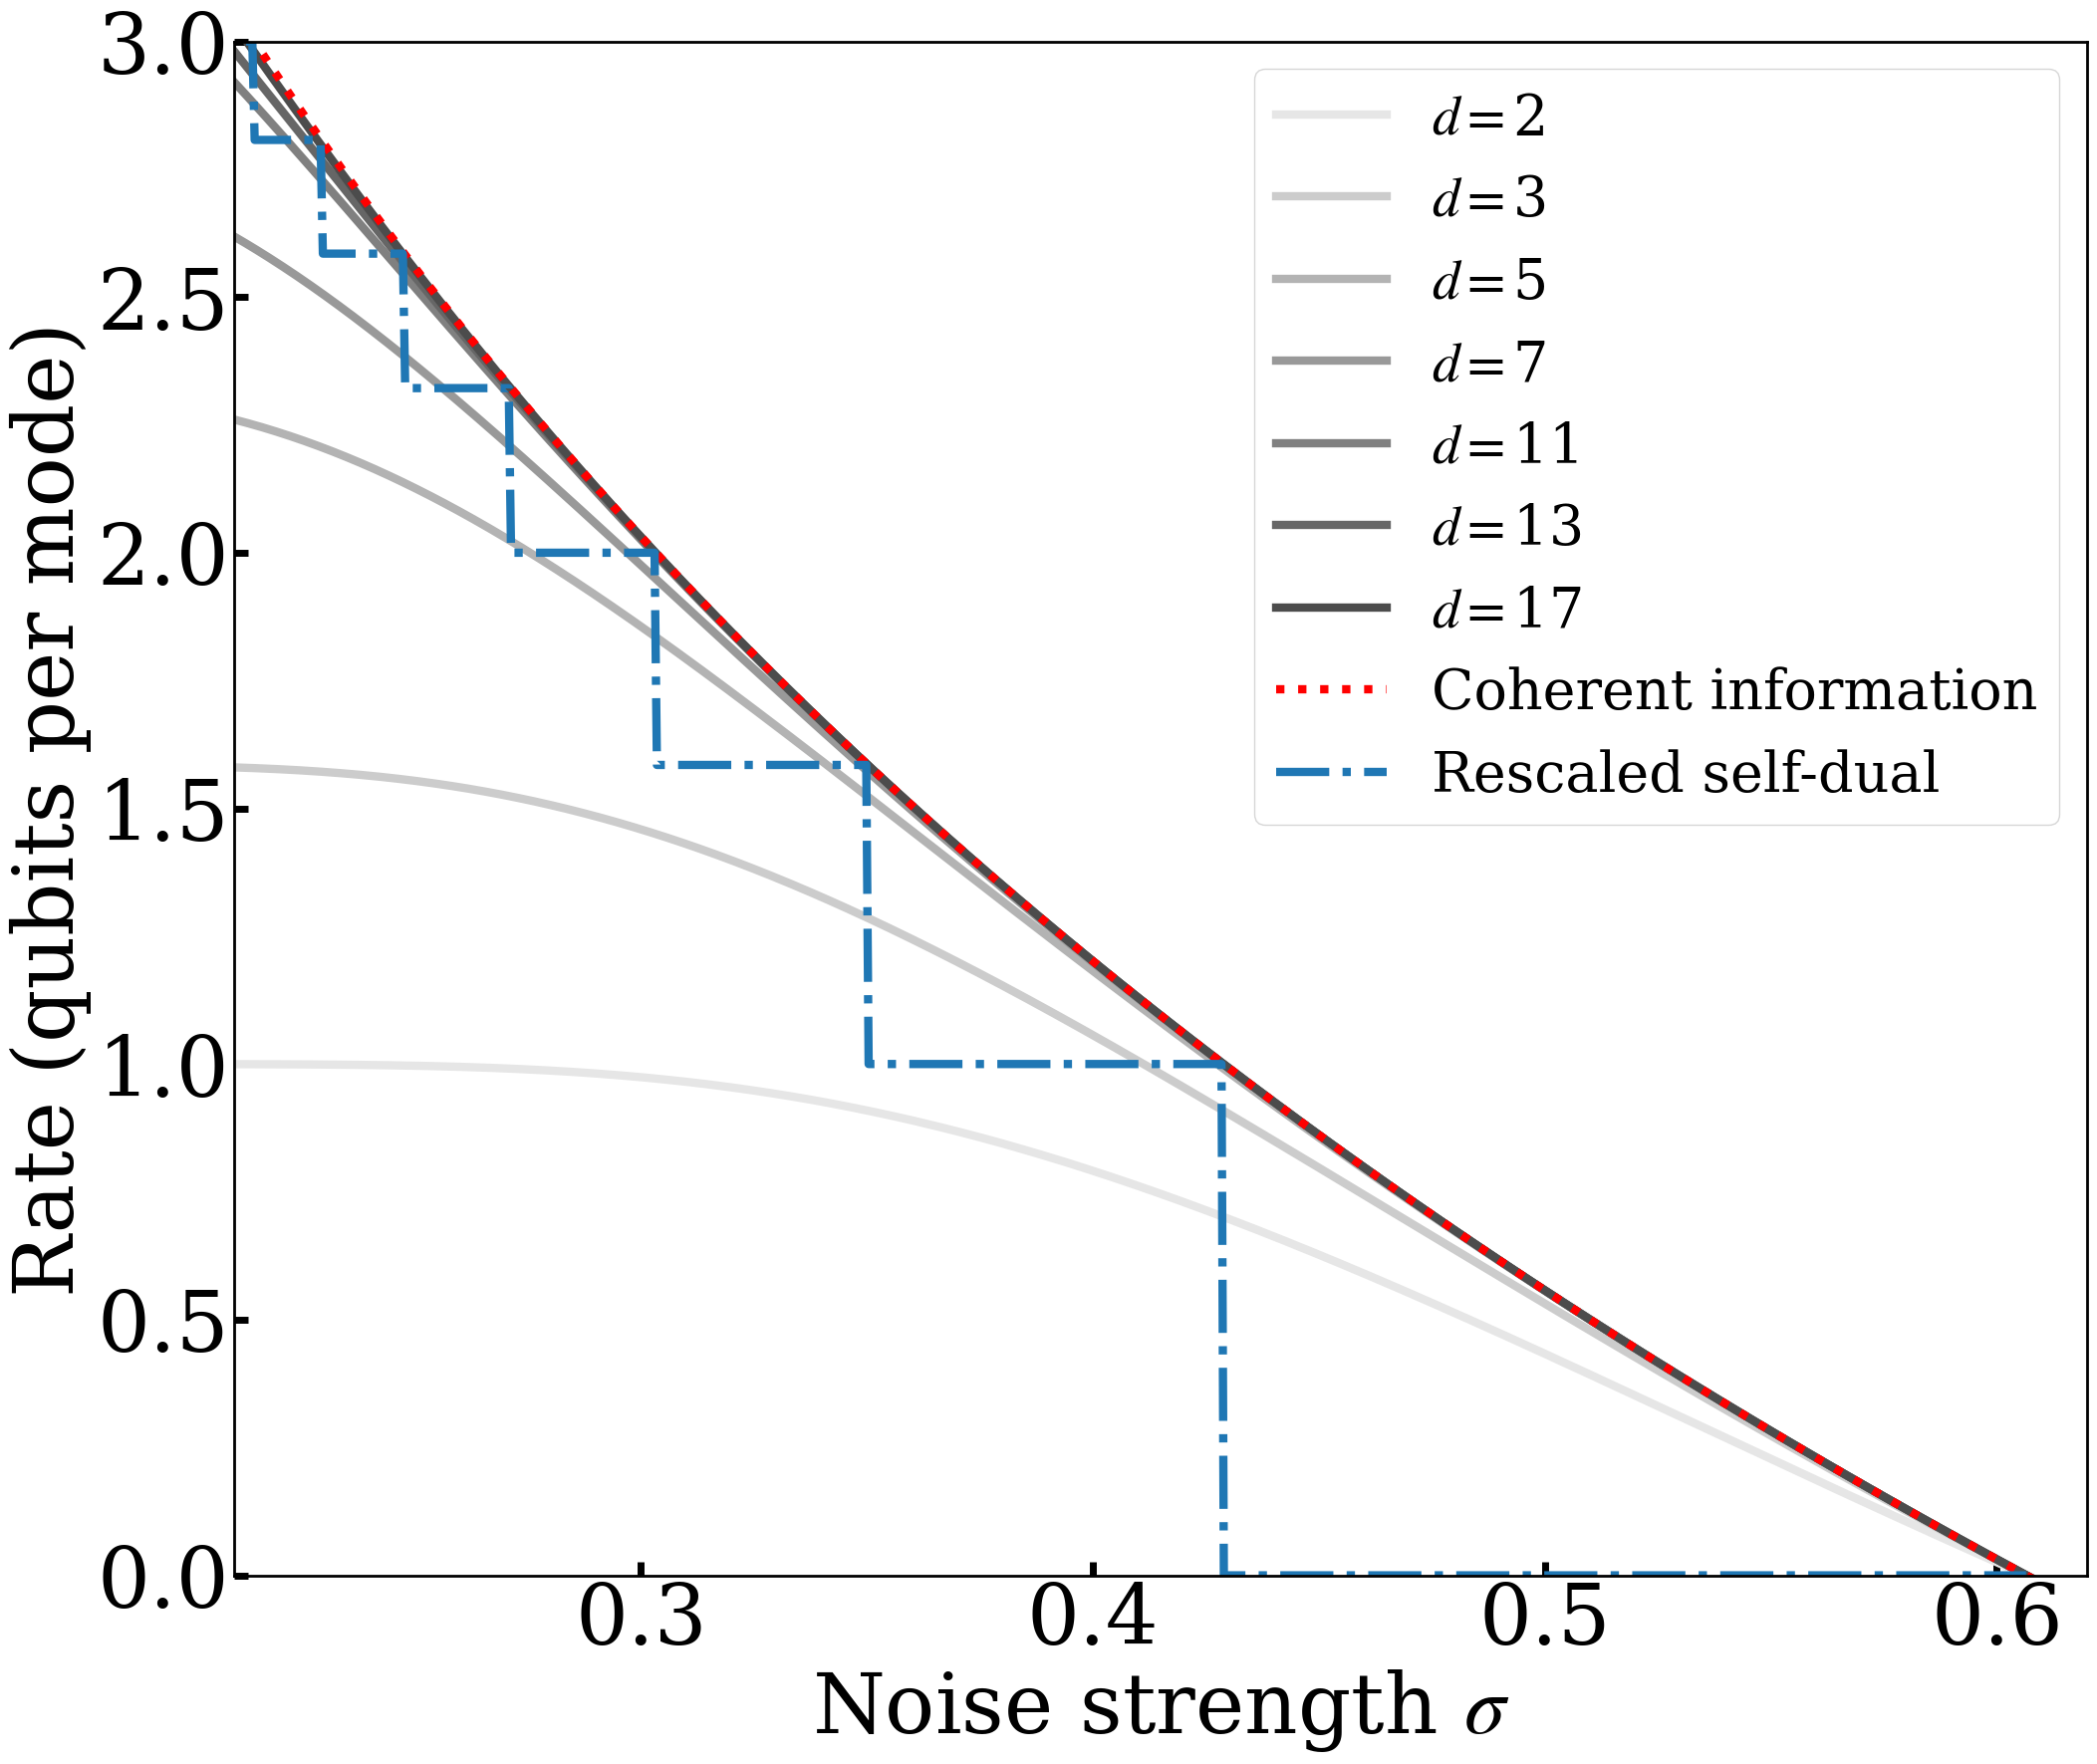

In [4]:
plt.rcParams["figure.figsize"] = (24,20)
I_analog_sq = np.load('I_analog_sq_d_2-17.npy')
coherent_info = lambda sig: np.log2(1/(sig*sig*np.e))
ds = [2,3,5,7,11,13,17]
sig1 = np.linspace(0.1,0.62,1000)

for i in range(len(I_analog_sq)):
    plt.plot(sig1,I_analog_sq[i],label=r'$d=$'+str(ds[i]),linewidth=6,color=str(0.9-0.1*i))
plt.plot(sig1,coherent_info(sig1),label='Coherent information',linewidth=6,color='red',linestyle='dotted')
plt.plot(sig1,np.log2(np.floor(np.exp2(coherent_info(sig1)))),label=r'Rescaled self-dual',linewidth=6,linestyle='-.')

plt.ylabel(r'Rate (qubits per mode)',fontsize=60)
plt.xlabel(r'Noise strength $\sigma$',fontsize=60)
plt.legend()
plt.ylim(0,3)
plt.xlim(0.21,0.62)
plt.tick_params(axis='y', direction='in',width=5,length=10)
plt.tick_params(axis='x', direction='in',width=5,length=10)

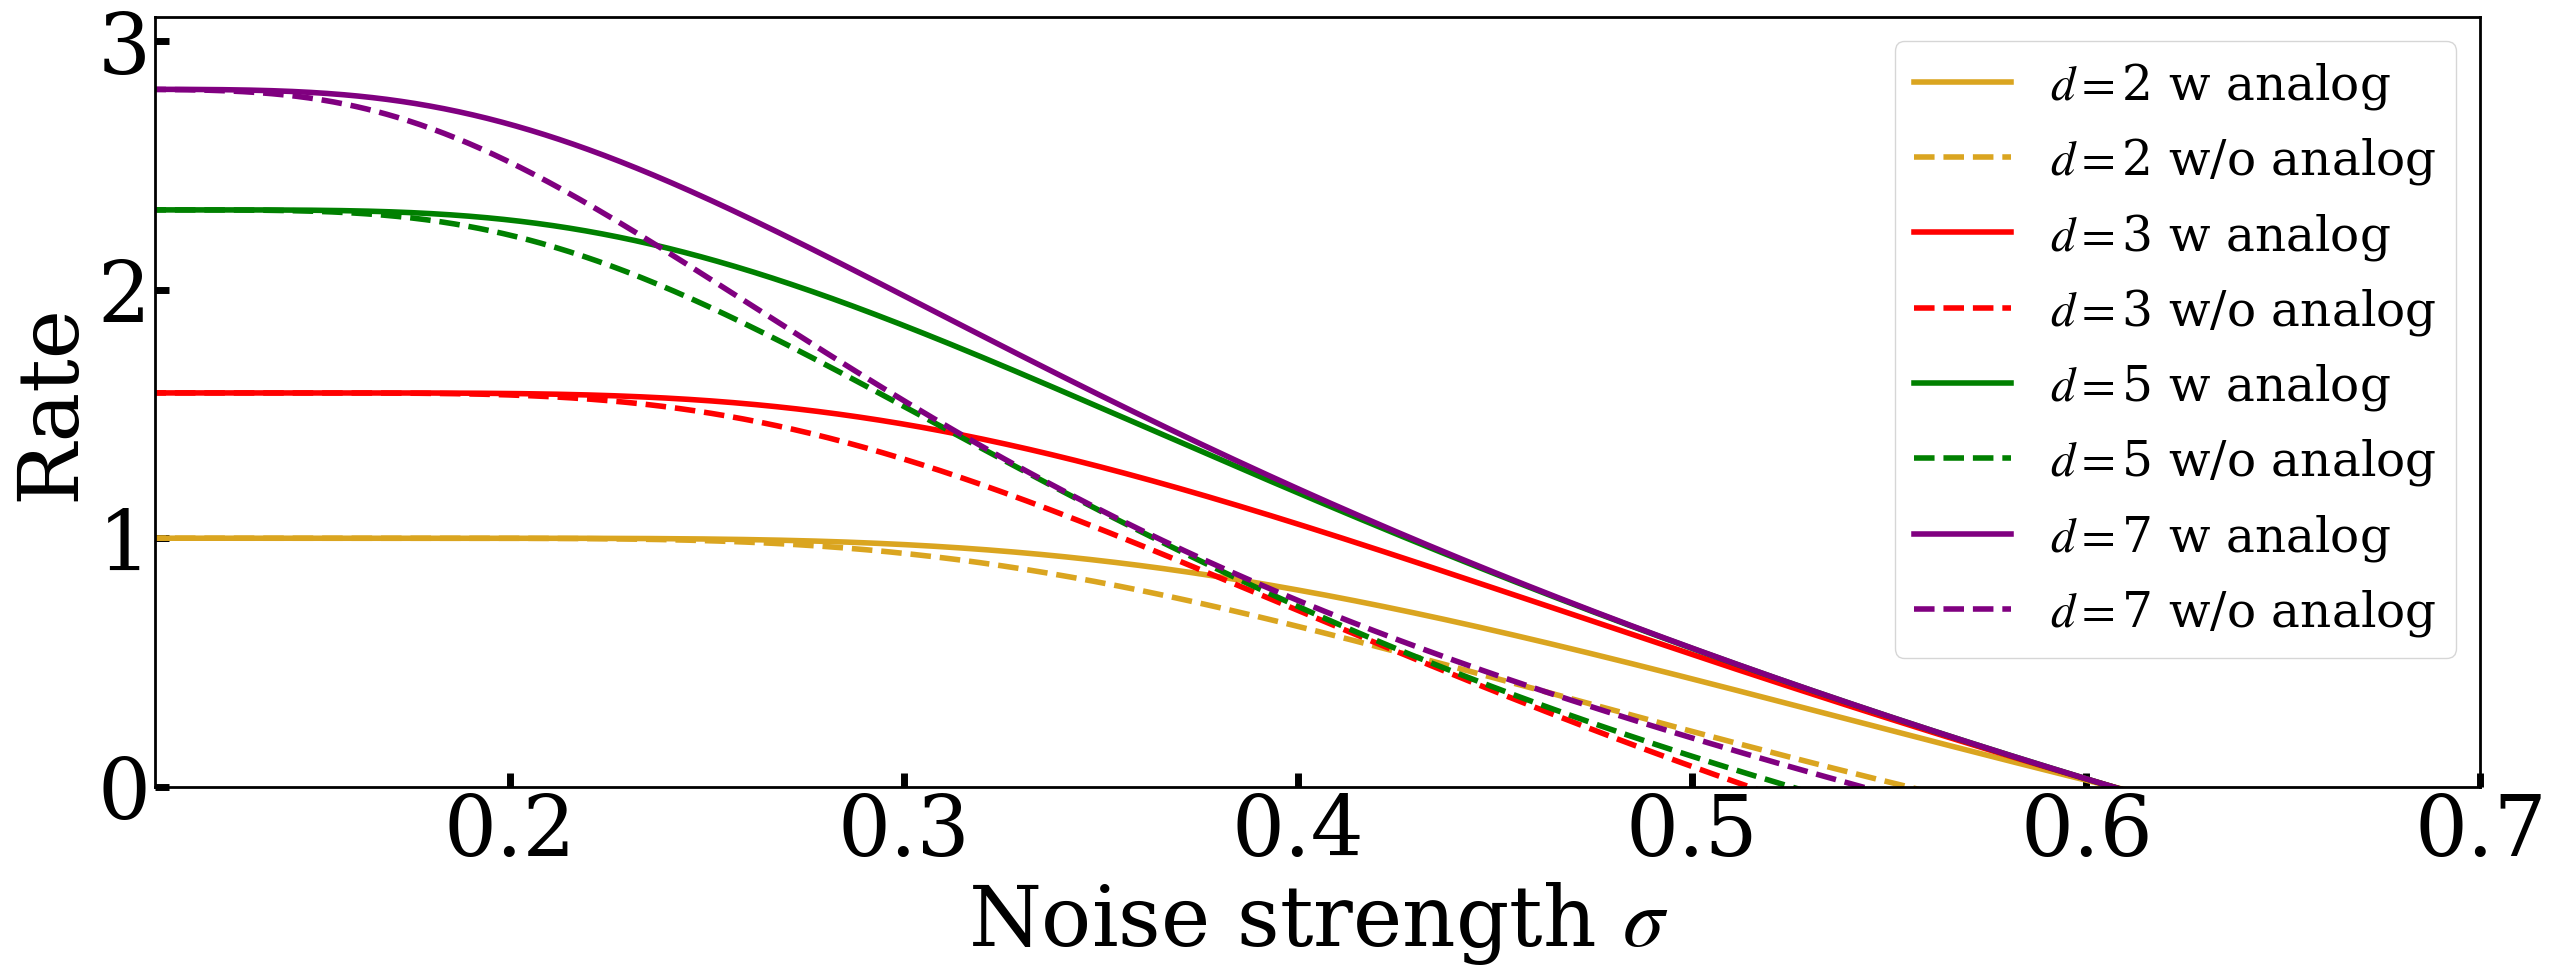

In [5]:
I_no_analog_sq = np.load('I_no_analog_sq_d_2-17.npy')
plt.rcParams["figure.figsize"] = (30,10)

for i in range(4):
        plt.plot(sig1, I_analog_sq[i],label=r'$d=$'+str(ds[i])+' w analog',color=colors[i],linewidth=4)
        plt.plot(sig1, I_no_analog_sq[ds[i]-2],label=r'$d=$'+str(ds[i])+' w/o analog',color=colors[i],linestyle='dashed',linewidth=4)

plt.xlabel(r'Noise strength $\sigma$')
plt.ylabel('Rate')
plt.legend(fontsize=35)
plt.xlim(0.11,0.7)
plt.ylim(0,3.1)
plt.tick_params(axis='y', direction='in',width=5,length=10)
plt.tick_params(axis='x', direction='in',width=5,length=10)

In [6]:
N = [2**9,2**10,2**11,2**12,2**13,2**14,2**15,2**16,2**17,2**18]
rate22 = []
pe22 = []
for n in N:
    Z = np.sort(np.load('Zdata/Z_Wi_sig0.51_'+str(n)+'_d2.npy'))
    pp = 0.0
    px = 0.0
    count1 = 0
    count2 = 0
    for i in range(n):
        if px >= 0.5*(1/4)**(np.log2(n)/9):
            break
        px += Z[i]
        count1 += 1
    pe22.append(px)
    rate22.append(max(0,(count1*2)/len(Z) - 1))

print(*pe22)
print(*rate22)

0.12964782916124862 0.11253618496910574 0.09369755523776632 0.08020513778713982 0.0680505742741677 0.05816798955081615 0.04964404960847456 0.04257297319263517 0.036514722385597775 0.03128405414017711
0 0.033203125 0.0673828125 0.10302734375 0.13623046875 0.1666259765625 0.1937255859375 0.219635009765625 0.24169921875 0.2640838623046875


In [7]:
N = [2**9,2**10,2**11,2**12,2**13,2**14,2**15,2**16,2**17,2**18]
rate = []
pe = []
for n in N:
    Z = np.sort(np.load('Zdata/Z_Wi_sig0.55_'+str(n)+'_d2.npy'))
    pp = 0.0
    px = 0.0
    count1 = 0
    count2 = 0
    for i in range(n):
        if px >= 0.5*(1/4)**(np.log2(n)/9):
            break
        px += Z[i]
        count1 += 1
    pe.append(px)
    rate.append(max(0,(count1*2)/len(Z) - 1))

print(*pe)
print(*rate)

0.13579742750446286 0.11204198187057228 0.09187866501654389 0.07987516492519137 0.06787755565544207 0.05787100333543645 0.049712943137380367 0.042594546024587586 0.03650357892813669 0.031277217799550665
0 0 0 0 0 0 0 0 0.0311431884765625 0.0917510986328125


In [8]:
N = [2**9,2**10,2**11,2**12,2**13,2**14,2**15,2**16,2**17,2**18]
rate51 = []
pe51 = []
for n in N:
    Z = np.sort(np.load('Zdata/Z_Wi_sig0.4_'+str(n)+'_d5.npy'))
    ZP = np.sort(np.load('Zdata/Z_Wi_sig0.4_'+str(n)+'_d5_P.npy')) 
    pp = 0.0
    px = 0.0
    count1 = 0
    count2 = 0
    for i in range(n):
        if px >= 0.5*(1/4)**(np.log2(n)/9):
            break
        px += 4*Z[i]
        count1 += 1
    for i in range(n):
        if pp >= 0.5*(1/4)**(np.log2(n)/9):
            break
        pp += 4*ZP[i]
        count2 += 1
    pe51.append((pp,px))
    rate51.append(max(0,(count1+count2)/len(Z) - 1))

print(*pe51)
print(*rate51)

(0.13465969992711857, 0.12727987880557493) (0.11305012778566312, 0.10917722199562956) (0.09272160446953331, 0.09235813169105322) (0.0794104801452534, 0.0803289745014216) (0.0675911074306875, 0.06756960013839491) (0.05790481143477916, 0.05791908938222957) (0.049617668750758265, 0.0497293377905407) (0.042563532208328286, 0.04256645291792509) (0.03651594316160337, 0.03647868250005484) (0.03127511136298382, 0.03126176543898843)
0.037109375 0.08203125 0.125 0.169677734375 0.2080078125 0.24395751953125 0.276763916015625 0.3044891357421875 0.33013153076171875 0.3525390625


In [9]:
N = [2**9,2**10,2**11,2**12,2**13,2**14,2**15,2**16,2**17,2**18]
rate510 = []
pe510 = []
for n in N:
    Z = np.sort(np.load('Zdata_alpha/Z_Wi_sig0.32_'+str(n)+'_d5_a2_Q.npy'))
    ZP = np.sort(np.load('Zdata_alpha/Z_Wi_sig0.32_'+str(n)+'_d5_a2_P.npy')) 
    pp = 0.0
    px = 0.0
    count1 = 0
    count2 = 0
    for i in range(n):
        if px >= 0.5*(1/4)**(np.log2(n)/9):
            break
        px += 4*Z[i]
        count1 += 1
    for i in range(n):
        if pp >= 0.5*(1/4)**(np.log2(n)/9):
            break
        pp += 4*ZP[i]
        count2 += 1
    pe510.append((pp,px))
    rate510.append(max(0,(count1+count2)/len(Z) - 1))

print(*pe510)
print(*rate510)

(0.1295684639129105, 0.13263324110343613) (0.11578942295935342, 0.11567866914231623) (0.09280826831641786, 0.09348029702288373) (0.08118827144033916, 0.08092235634645223) (0.0691286187887881, 0.06810010752836512) (0.058435720125931845, 0.05874946009350769) (0.049770793131492776, 0.05004207287898871) (0.04267248158340648, 0.04272697878549831) (0.036494369539798, 0.03645611176160892) (0.031263597455049974, 0.03130600125429698)
0.55078125 0.5703125 0.59228515625 0.61181640625 0.630615234375 0.64581298828125 0.659454345703125 0.6717987060546875 0.6826019287109375 0.6916465759277344


In [10]:
N = [2**9,2**10,2**11,2**12,2**13,2**14,2**15,2**16,2**17,2**18]
rate511 = []
pe511 = []
for n in N:
    Z = np.sort(np.load('Zdata_alpha/Z_Wi_sig0.4_'+str(n)+'_d5_a2_Q.npy'))
    ZP = np.sort(np.load('Zdata_alpha/Z_Wi_sig0.4_'+str(n)+'_d5_a2_P.npy')) 
    pp = 0.0
    px = 0.0
    count1 = 0
    count2 = 0
    for i in range(n):
        if px >= 0.5*(1/4)**(np.log2(n)/9):
            break
        px += 4*Z[i]
        count1 += 1
    for i in range(n):
        if pp >= 0.5*(1/4)**(np.log2(n)/9):
            break
        pp += 4*ZP[i]
        count2 += 1
    pe511.append((pp,px))
    rate511.append(max(0,(count1+count2)/len(Z) - 1))

print(*pe511)
print(*rate511)

(0.13973670271274835, 0.13627297368665947) (0.11483795722951326, 0.11215563070500031) (0.09463158387227624, 0.09257560612720947) (0.07912204090215029, 0.07885076950313982) (0.06793471741823993, 0.06804259408826038) (0.0583643284167325, 0.05837699133010153) (0.04978032705864047, 0.04975642211920149) (0.042660433460651896, 0.042707458421775896) (0.036576962755659415, 0.0364742456408494) (0.031258809094588794, 0.03126734034118807)
0.28125 0.306640625 0.32861328125 0.352294921875 0.3721923828125 0.39007568359375 0.406829833984375 0.4213714599609375 0.43392181396484375 0.4447135925292969


In [11]:
N = [2**9,2**10,2**11,2**12,2**13,2**14,2**15,2**16,2**17,2**18]
rate521 = []
pe521 = []
for n in N:
    Z = np.sort(np.load('Zdata_alpha/Z_Wi_sig0.5_'+str(n)+'_d5_a2_Q.npy'))
    ZP = np.sort(np.load('Zdata_alpha/Z_Wi_sig0.5_'+str(n)+'_d5_a2_P.npy')) 
    pp = 0.0
    px = 0.0
    count1 = 0
    count2 = 0
    for i in range(n):
        if px >= 0.5*(1/4)**(np.log2(n)/9):
            break
        px += 4*Z[i]
        count1 += 1
    for i in range(n):
        if pp >= 0.5*(1/4)**(np.log2(n)/9):
            break
        pp += 4*ZP[i]
        count2 += 1
    pe521.append((pp,px))
    rate521.append(max(0,(count1+count2)/len(Z) - 1))

print(*pe521)
print(*rate521)

(0.13869010983369984, 0.138268168237318) (0.10967963346311649, 0.109645077443953) (0.09648503537571769, 0.0969488478512839) (0.08126206134187154, 0.07912237782509095) (0.06891309177218129, 0.0689712834713755) (0.058017281819528005, 0.05791139709455204) (0.04987945589020626, 0.04982237244530551) (0.042660547359543055, 0.04259938481330065) (0.03656716543822989, 0.0364793670125787) (0.03126073056638081, 0.03128534482276383)
0 0.0244140625 0.05322265625 0.07470703125 0.0960693359375 0.115478515625 0.13238525390625 0.146881103515625 0.16015625 0.17168426513671875


In [12]:
N = [2**9,2**10,2**11,2**12,2**13,2**14,2**15,2**16,2**17,2**18]
rate7 = []
pe7 = []
for n in N:
    Z = np.sort(np.load('Zdata_alpha/Z_Wi_sig0.32_'+str(n)+'_d7_a3_Q.npy'))
    ZP = np.sort(np.load('Zdata_alpha/Z_Wi_sig0.32_'+str(n)+'_d7_a3_P.npy')) 
    pp = 0.0
    px = 0.0
    count1 = 0
    count2 = 0
    for i in range(n):
        if px >= 0.5*(1/4)**(np.log2(n)/9):
            break
        px += 6*Z[i]
        count1 += 1
    for i in range(n):
        if pp >= 0.5*(1/4)**(np.log2(n)/9):
            break
        pp += 6*ZP[i]
        count2 += 1
    pe7.append((pp,px))
    rate7.append(max(0,(count1+count2)/len(Z) - 1))

print(*pe7)
print(*rate7)

(0.14265142471686185, 0.14510407840192496) (0.11706069618920534, 0.11282352375426473) (0.0925297880723711, 0.09649859068982408) (0.08209573764981765, 0.08185873241140736) (0.0687014802349062, 0.06835551270285957) (0.05847347859335216, 0.05830223836109784) (0.049689331697402535, 0.05002330190669277) (0.04262617542071692, 0.042624604309149064) (0.03656999542434043, 0.03658883285340843) (0.031300263411006016, 0.031275582680410474)
0.451171875 0.478515625 0.4970703125 0.518798828125 0.5367431640625 0.5516357421875 0.564971923828125 0.577178955078125 0.5873947143554688 0.5963668823242188


In [13]:
N = [2**9,2**10,2**11,2**12,2**13,2**14,2**15,2**16,2**17,2**18]
rate71 = []
pe71 = []
for n in N:
    Z = np.sort(np.load('Zdata_alpha/Z_Wi_sig0.37_'+str(n)+'_d7_a3_Q.npy'))
    ZP = np.sort(np.load('Zdata_alpha/Z_Wi_sig0.37_'+str(n)+'_d7_a3_P.npy')) 
    pp = 0.0
    px = 0.0
    count1 = 0
    count2 = 0
    for i in range(n):
        if px >= 0.5*(1/4)**(np.log2(n)/9):
            break
        px += 6*Z[i]
        count1 += 1
    for i in range(n):
        if pp >= 0.5*(1/4)**(np.log2(n)/9):
            break
        pp += 6*ZP[i]
        count2 += 1
    pe71.append((pp,px))
    rate71.append(max(0,(count1+count2)/len(Z) - 1))

print(*pe71)
print(*rate71)

(0.12688786587905324, 0.13001081201876977) (0.11458682188812938, 0.11884319328568077) (0.09555657976556177, 0.095503187318477) (0.08088572024067332, 0.07981444577092342) (0.06799009217714054, 0.06853516400834368) (0.05795992608386875, 0.058248253690940235) (0.049829023227453716, 0.049905445723858195) (0.042753178806908265, 0.04253732871046165) (0.0365462325569265, 0.036520270670986246) (0.03128205192516828, 0.03130861448054331)
0.3046875 0.326171875 0.349609375 0.369384765625 0.3878173828125 0.40521240234375 0.418670654296875 0.4315185546875 0.44248199462890625 0.4520378112792969


In [14]:
N = [2**9,2**10,2**11,2**12,2**13,2**14,2**15,2**16,2**17,2**18]
rate72 = []
pe72 = []
for n in N:
    Z = np.sort(np.load('Zdata_alpha/Z_Wi_sig0.29_'+str(n)+'_d7_a3_Q.npy'))
    ZP = np.sort(np.load('Zdata_alpha/Z_Wi_sig0.29_'+str(n)+'_d7_a3_P.npy')) 
    pp = 0.0
    px = 0.0
    count1 = 0
    count2 = 0
    for i in range(n):
        if px >= 0.5*(1/4)**(np.log2(n)/9):
            break
        px += 6*Z[i]
        count1 += 1
    for i in range(n):
        if pp >= 0.5*(1/4)**(np.log2(n)/9):
            break
        pp += 6*ZP[i]
        count2 += 1
    pe72.append((pp,px))
    rate72.append(max(0,(count1+count2)/len(Z) - 1))

print(*pe72)
print(*rate72)

(0.14181617921335762, 0.13896706380998275) (0.11107941645597325, 0.10851910769764898) (0.09303304844918867, 0.09355837265935465) (0.07913637119968141, 0.08186503974207311) (0.06838043002237297, 0.06882639221273082) (0.05850013073467892, 0.058532828243806546) (0.0497306882095296, 0.04986027226141946) (0.04269424058031655, 0.042759050161852954) (0.03649300819545657, 0.03656292898363573) (0.03129801765785968, 0.0312811587744349)
0.560546875 0.57421875 0.5947265625 0.614990234375 0.630615234375 0.6458740234375 0.658935546875 0.669891357421875 0.679412841796875 0.6874961853027344


/var/folders/dd/7cnlb81x5cxgmvjv3rvqzp780000gp/T/ipykernel_30836/309294388.py:19: RuntimeWarning: divide by zero encountered in log2
  plt.plot(sig1,np.log2(np.floor(np.exp2(coherent_info(sig1)))),label=r'Rescaled self-dual',linewidth=6,linestyle='-.')


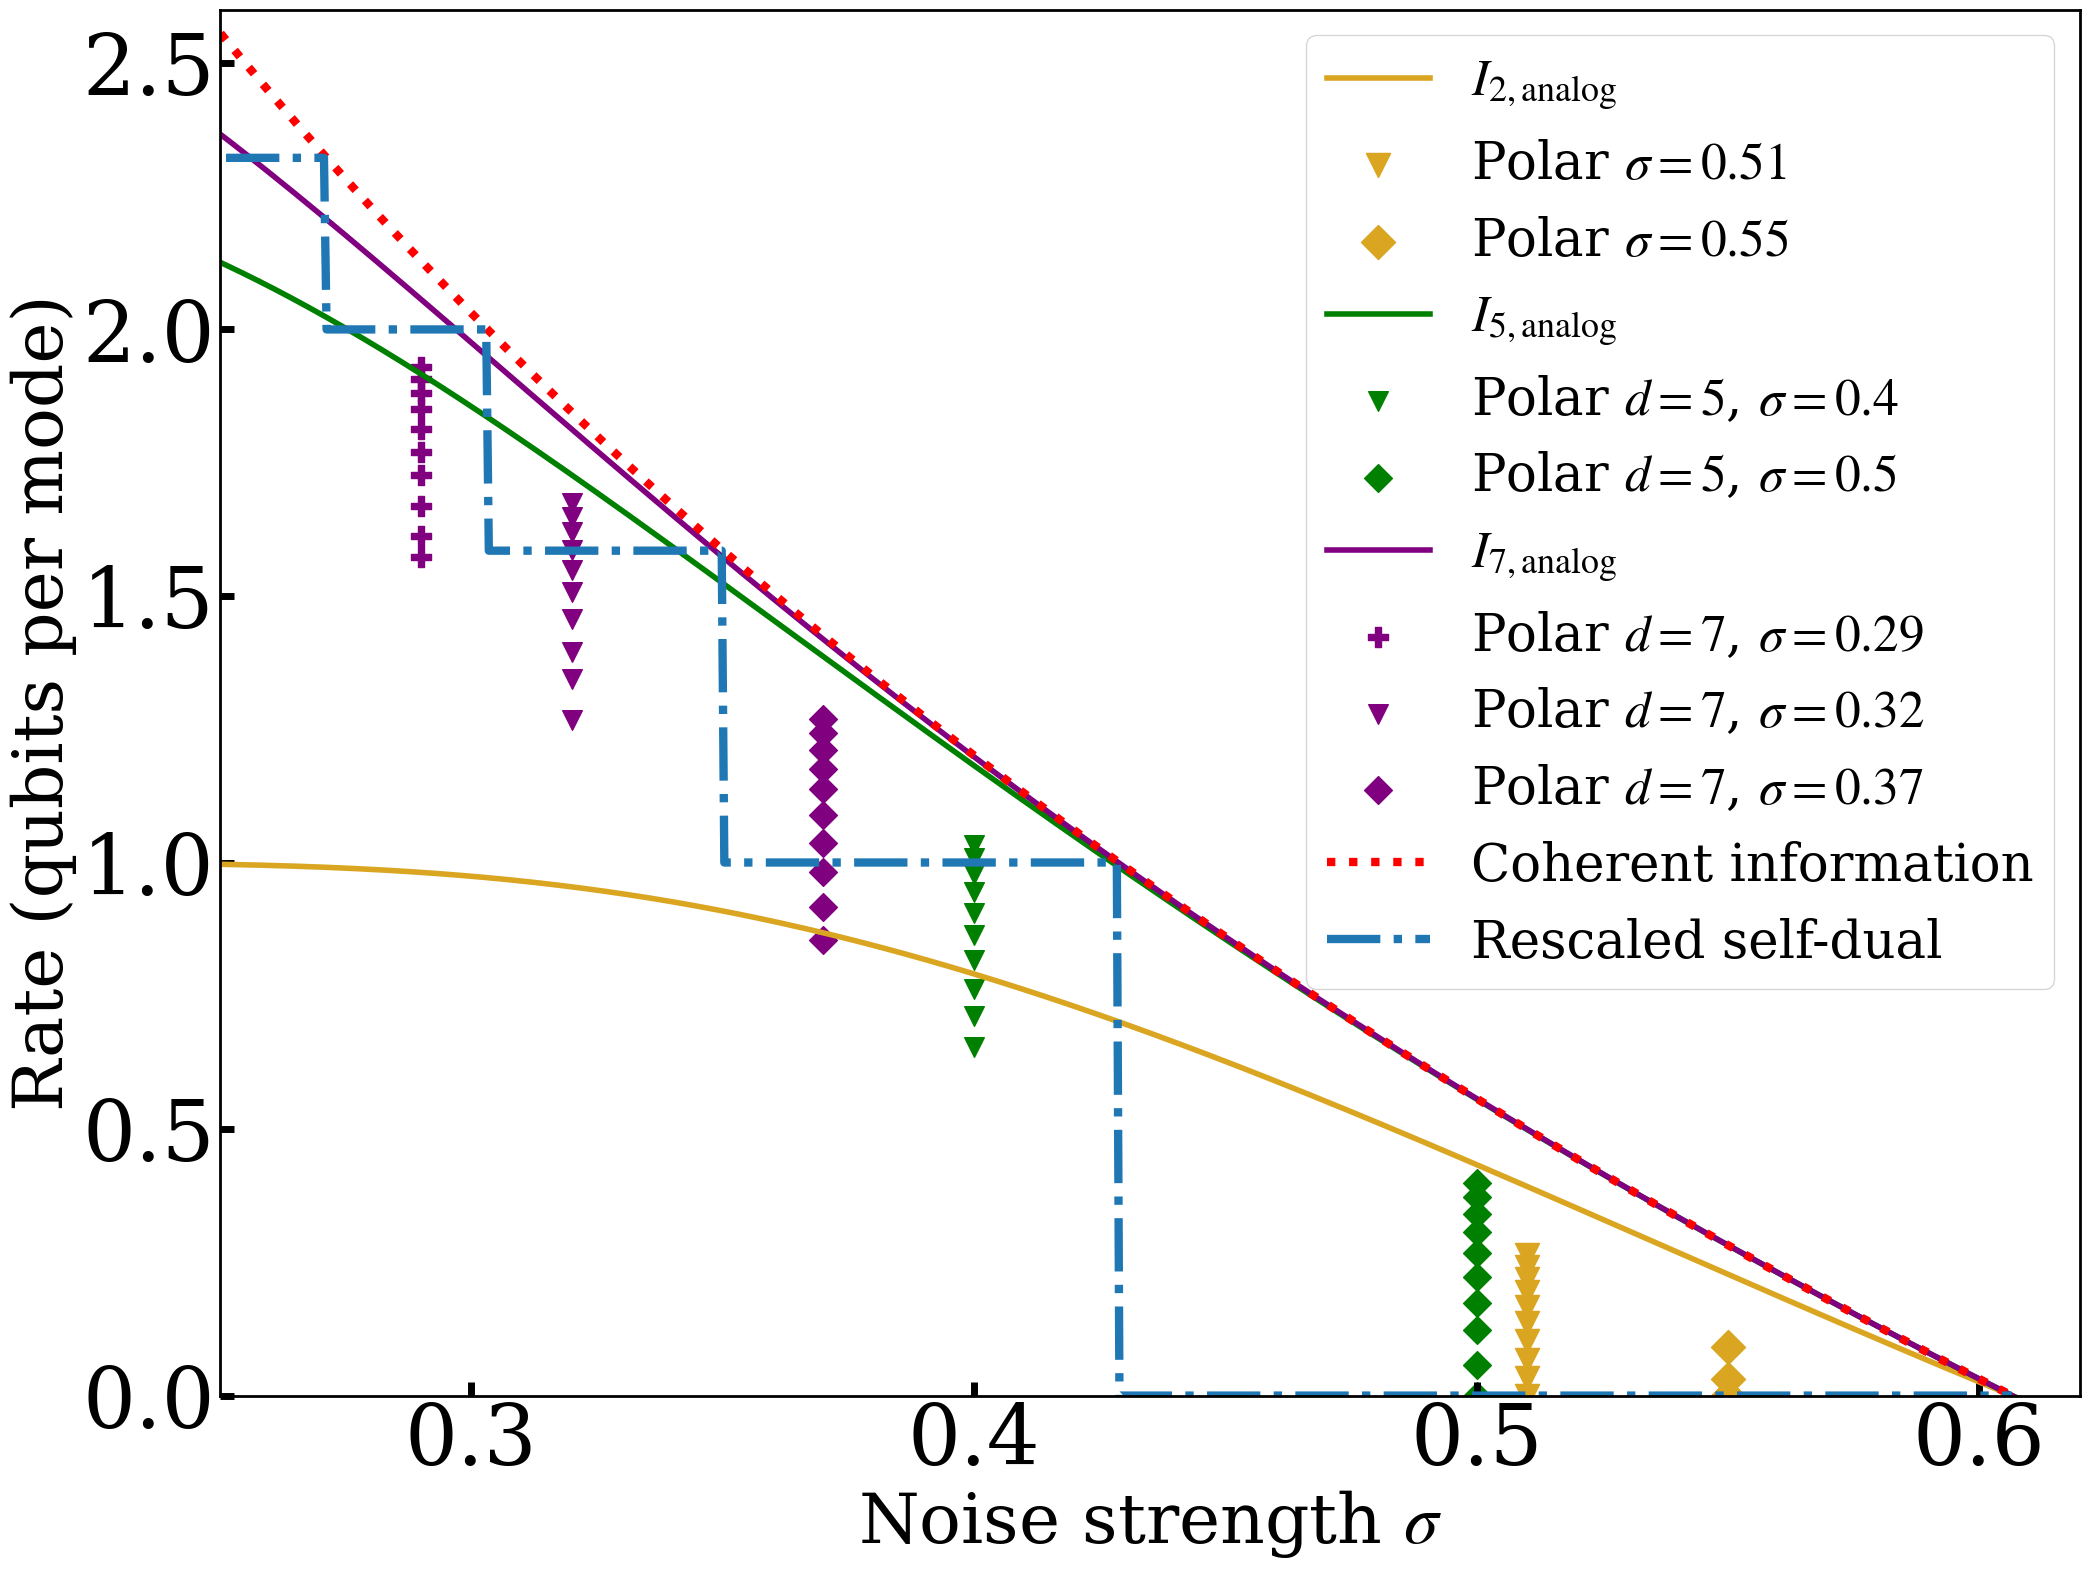

In [15]:
plt.rcParams["figure.figsize"] = (24,18)
#d=2
plt.plot(sig1, I_analog_sq[0],label=r'$I_{2,\mathrm{analog}}$',color=colors[0],linewidth=4)
plt.scatter([0.51]*len(rate22),rate22,label=r'Polar $\sigma=0.51$',marker='v',s=300,color=colors[0])
plt.scatter([0.55]*len(rate),rate,label=r'Polar $\sigma=0.55$',marker='D',s=300,color=colors[0])

#d=5
plt.plot(sig1, I_analog_sq[2],label=r'$I_{5,\mathrm{analog}}$',color=colors[2],linewidth=4)
plt.scatter(0.4+0*np.array(rate511),np.log2(5)*np.array(rate511),s=200,marker='v',color=colors[2],label=r'Polar $d=5$, $\sigma=0.4$')
plt.scatter(0.5+0*np.array(rate521),np.log2(5)*np.array(rate521),s=200,color=colors[2],label=r'Polar $d=5$, $\sigma=0.5$',marker='D')

#d=7
plt.plot(sig1, I_analog_sq[3],label=r'$I_{7,\mathrm{analog}}$',color=colors[3],linewidth=4)
plt.scatter(0.29+0*np.array(rate72),np.log2(7)*np.array(rate72),s=200,label=r'Polar $d=7$, $\sigma=0.29$',color=colors[3],marker='P')
plt.scatter(0.32+0*np.array(rate7),np.log2(7)*np.array(rate7),s=200,marker='v',color=colors[3],label=r'Polar $d=7$, $\sigma=0.32$')
plt.scatter(0.37+0*np.array(rate71),np.log2(7)*np.array(rate71),s=200,marker='D',color=colors[3],label=r'Polar $d=7$, $\sigma=0.37$')

plt.plot(sig1,coherent_info(sig1),label='Coherent information',linewidth=6,color='red',linestyle='dotted')
plt.plot(sig1,np.log2(np.floor(np.exp2(coherent_info(sig1)))),label=r'Rescaled self-dual',linewidth=6,linestyle='-.')

plt.xlim(0.25,0.62)
plt.ylim(0,2.6)
plt.ylabel('Rate (qubits per mode)',fontsize=50)
plt.xlabel(r'Noise strength $\sigma$',fontsize=50)
plt.tick_params(axis='y', direction='in',width=5,length=10)
plt.tick_params(axis='x', direction='in',width=5,length=10)
plt.legend(fontsize=37,loc=1)

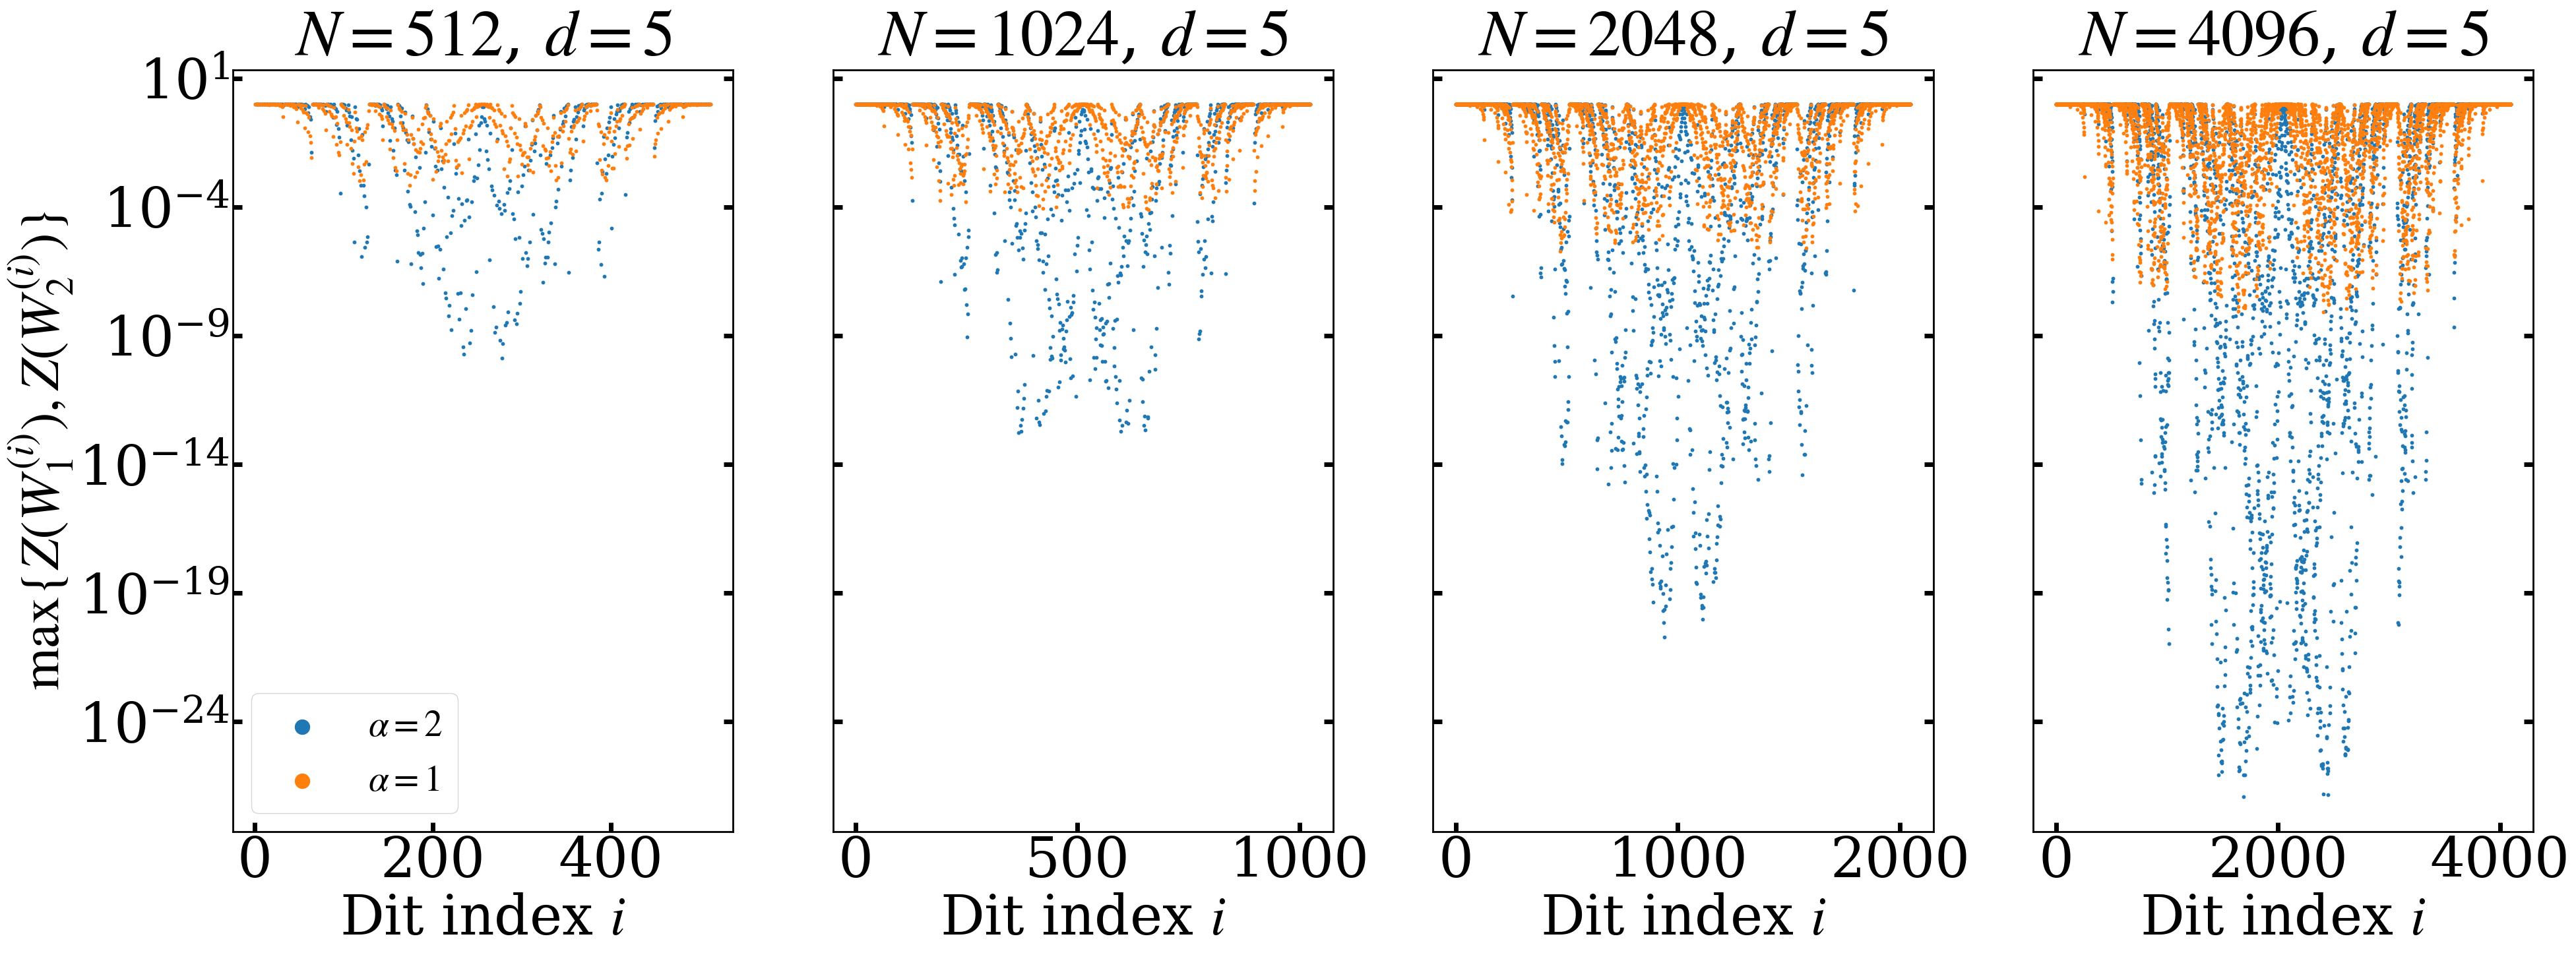

In [16]:
sze=10
plt.rcParams["figure.figsize"] = (45,15)

fig, axes = plt.subplots(1, 4, sharey=True)

ZX = np.load('Zdata_alpha/Z_Wi_sig0.4_512_d5_a2_Q.npy')
ZP = np.load('Zdata_alpha/Z_Wi_sig0.4_512_d5_a2_P.npy')
N = len(ZX)
axes[0].set_title('$N ='+str(N)+' $, $d=5$')
axes[0].scatter(range(1,N+1),np.maximum(ZX,ZP),s=sze,label=r'$\alpha = 2$')

ZX = np.load('Zdata/Z_Wi_sig0.4_512_d5.npy')
ZP = np.load('Zdata/Z_Wi_sig0.4_512_d5_P.npy')
axes[0].scatter(range(1,N+1),np.maximum(ZX,ZP),s=sze,label=r'$\alpha = 1$')
axes[0].legend(markerscale=5)

ZX = np.load('Zdata_alpha/Z_Wi_sig0.4_1024_d5_a2_Q.npy')
ZP = np.load('Zdata_alpha/Z_Wi_sig0.4_1024_d5_a2_P.npy')
N = len(ZX)
axes[1].set_title('$N ='+str(N)+' $, $d=5$')
axes[1].scatter(range(1,N+1),np.maximum(ZX,ZP),s=sze)
ZX = np.load('Zdata/Z_Wi_sig0.4_1024_d5.npy')
ZP = np.load('Zdata/Z_Wi_sig0.4_1024_d5_P.npy')
axes[1].scatter(range(1,N+1),np.maximum(ZX,ZP),s=sze)

ZX = np.load('Zdata_alpha/Z_Wi_sig0.4_2048_d5_a2_Q.npy')
ZP = np.load('Zdata_alpha/Z_Wi_sig0.4_2048_d5_a2_P.npy')
N = len(ZX)
axes[2].set_title('$N ='+str(N)+' $, $d=5$')
axes[2].scatter(range(1,N+1),np.maximum(ZX,ZP),s=sze)
ZX = np.load('Zdata/Z_Wi_sig0.4_2048_d5.npy')
ZP = np.load('Zdata/Z_Wi_sig0.4_2048_d5_P.npy')
axes[2].scatter(range(1,N+1),np.maximum(ZX,ZP),s=sze)

ZX = np.load('Zdata_alpha/Z_Wi_sig0.4_4096_d5_a2_Q.npy')
ZP = np.load('Zdata_alpha/Z_Wi_sig0.4_4096_d5_a2_P.npy')
N = len(ZX)
axes[3].set_title('$N ='+str(N)+' $, $d=5$')
axes[3].scatter(range(1,N+1),np.maximum(ZX,ZP),s=sze)
ZX = np.load('Zdata/Z_Wi_sig0.4_4096_d5.npy')
ZP = np.load('Zdata/Z_Wi_sig0.4_4096_d5_P.npy')
axes[3].scatter(range(1,N+1),np.maximum(ZX,ZP),s=sze)

axes[0].set_ylabel(r'$\max\{Z(W_1^{(i)}),Z(W_2^{(i)})\}$')
for i in range(4):
    axes[i].tick_params(axis='y', direction='in',width=5,length=10,right=True)
    axes[i].tick_params(axis='x', direction='in',width=5,length=10)
    axes[i].set_xlabel(r'Dit index $i$')
plt.yscale('log')

(0.0, 1.0)

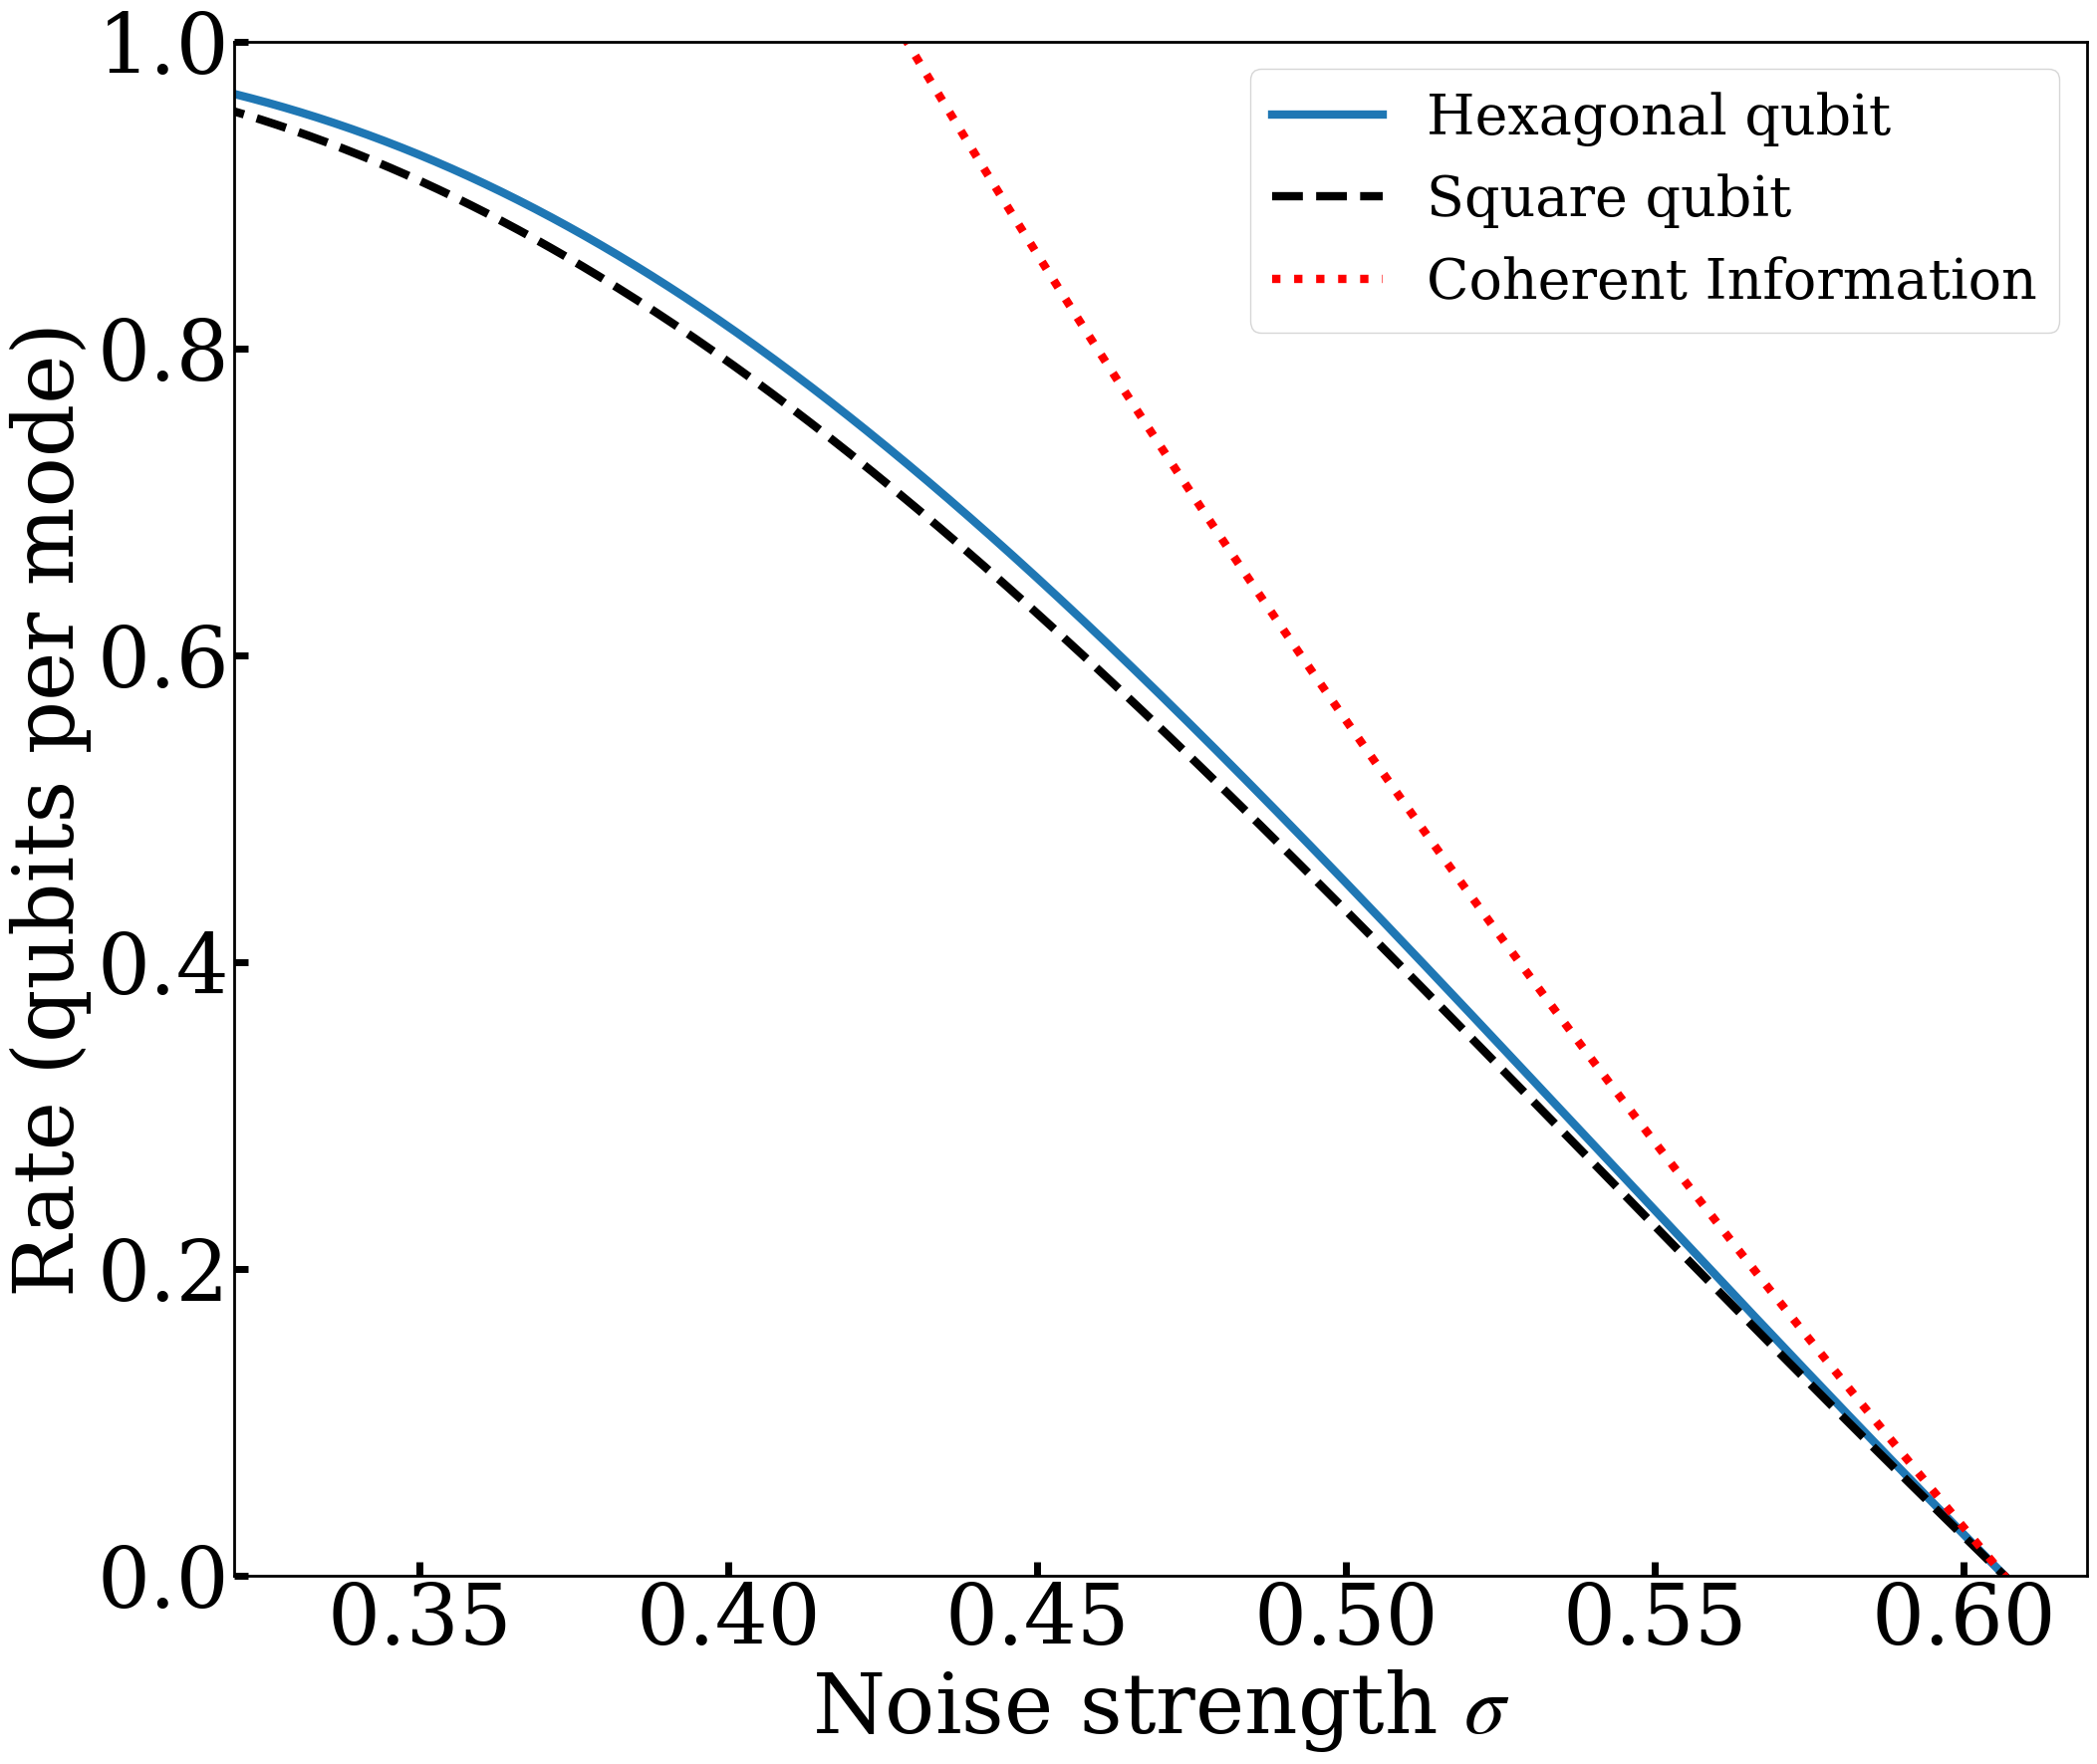

In [17]:
plt.rcParams["figure.figsize"] = (24,20)

plt.plot(np.linspace(0.32,0.62,1000),np.load('I_analog_hexd2_0.32to0.62.npy'),linewidth=6,label='Hexagonal qubit')
plt.plot(np.linspace(0.1,0.62,1000),np.load('I_analog_sq_d_2-17.npy')[0],linewidth=6,color='black',linestyle='--',label='Square qubit')
plt.plot(np.linspace(0.32,0.62,1000),coherent_info(np.linspace(0.32,0.62,1000)),linestyle='dotted',color='red',linewidth=6,label='Coherent Information')
#plt.yscale('log')
plt.legend()
plt.ylabel(r'Rate (qubits per mode)',fontsize=60)
plt.xlabel(r'Noise strength $\sigma$',fontsize=60)
plt.tick_params(axis='y', direction='in',width=5,length=10)
plt.tick_params(axis='x', direction='in',width=5,length=10)
plt.xlim(0.32,0.62)
plt.ylim(0,1)

In [18]:
factor = 3

I_analog_rect = []
for d in [2,3,5,7,11,13,17]:
    I_analog_rect.append(np.array([np.log2(d) - scipy.integrate.quad(Hp_rect_integrand,-1/np.sqrt(4*d),1/np.sqrt(4*d),args=(factor,s,d))[0] for s in sig1]))
I_analog_rect = np.array(I_analog_rect)

(0.11, 0.62)

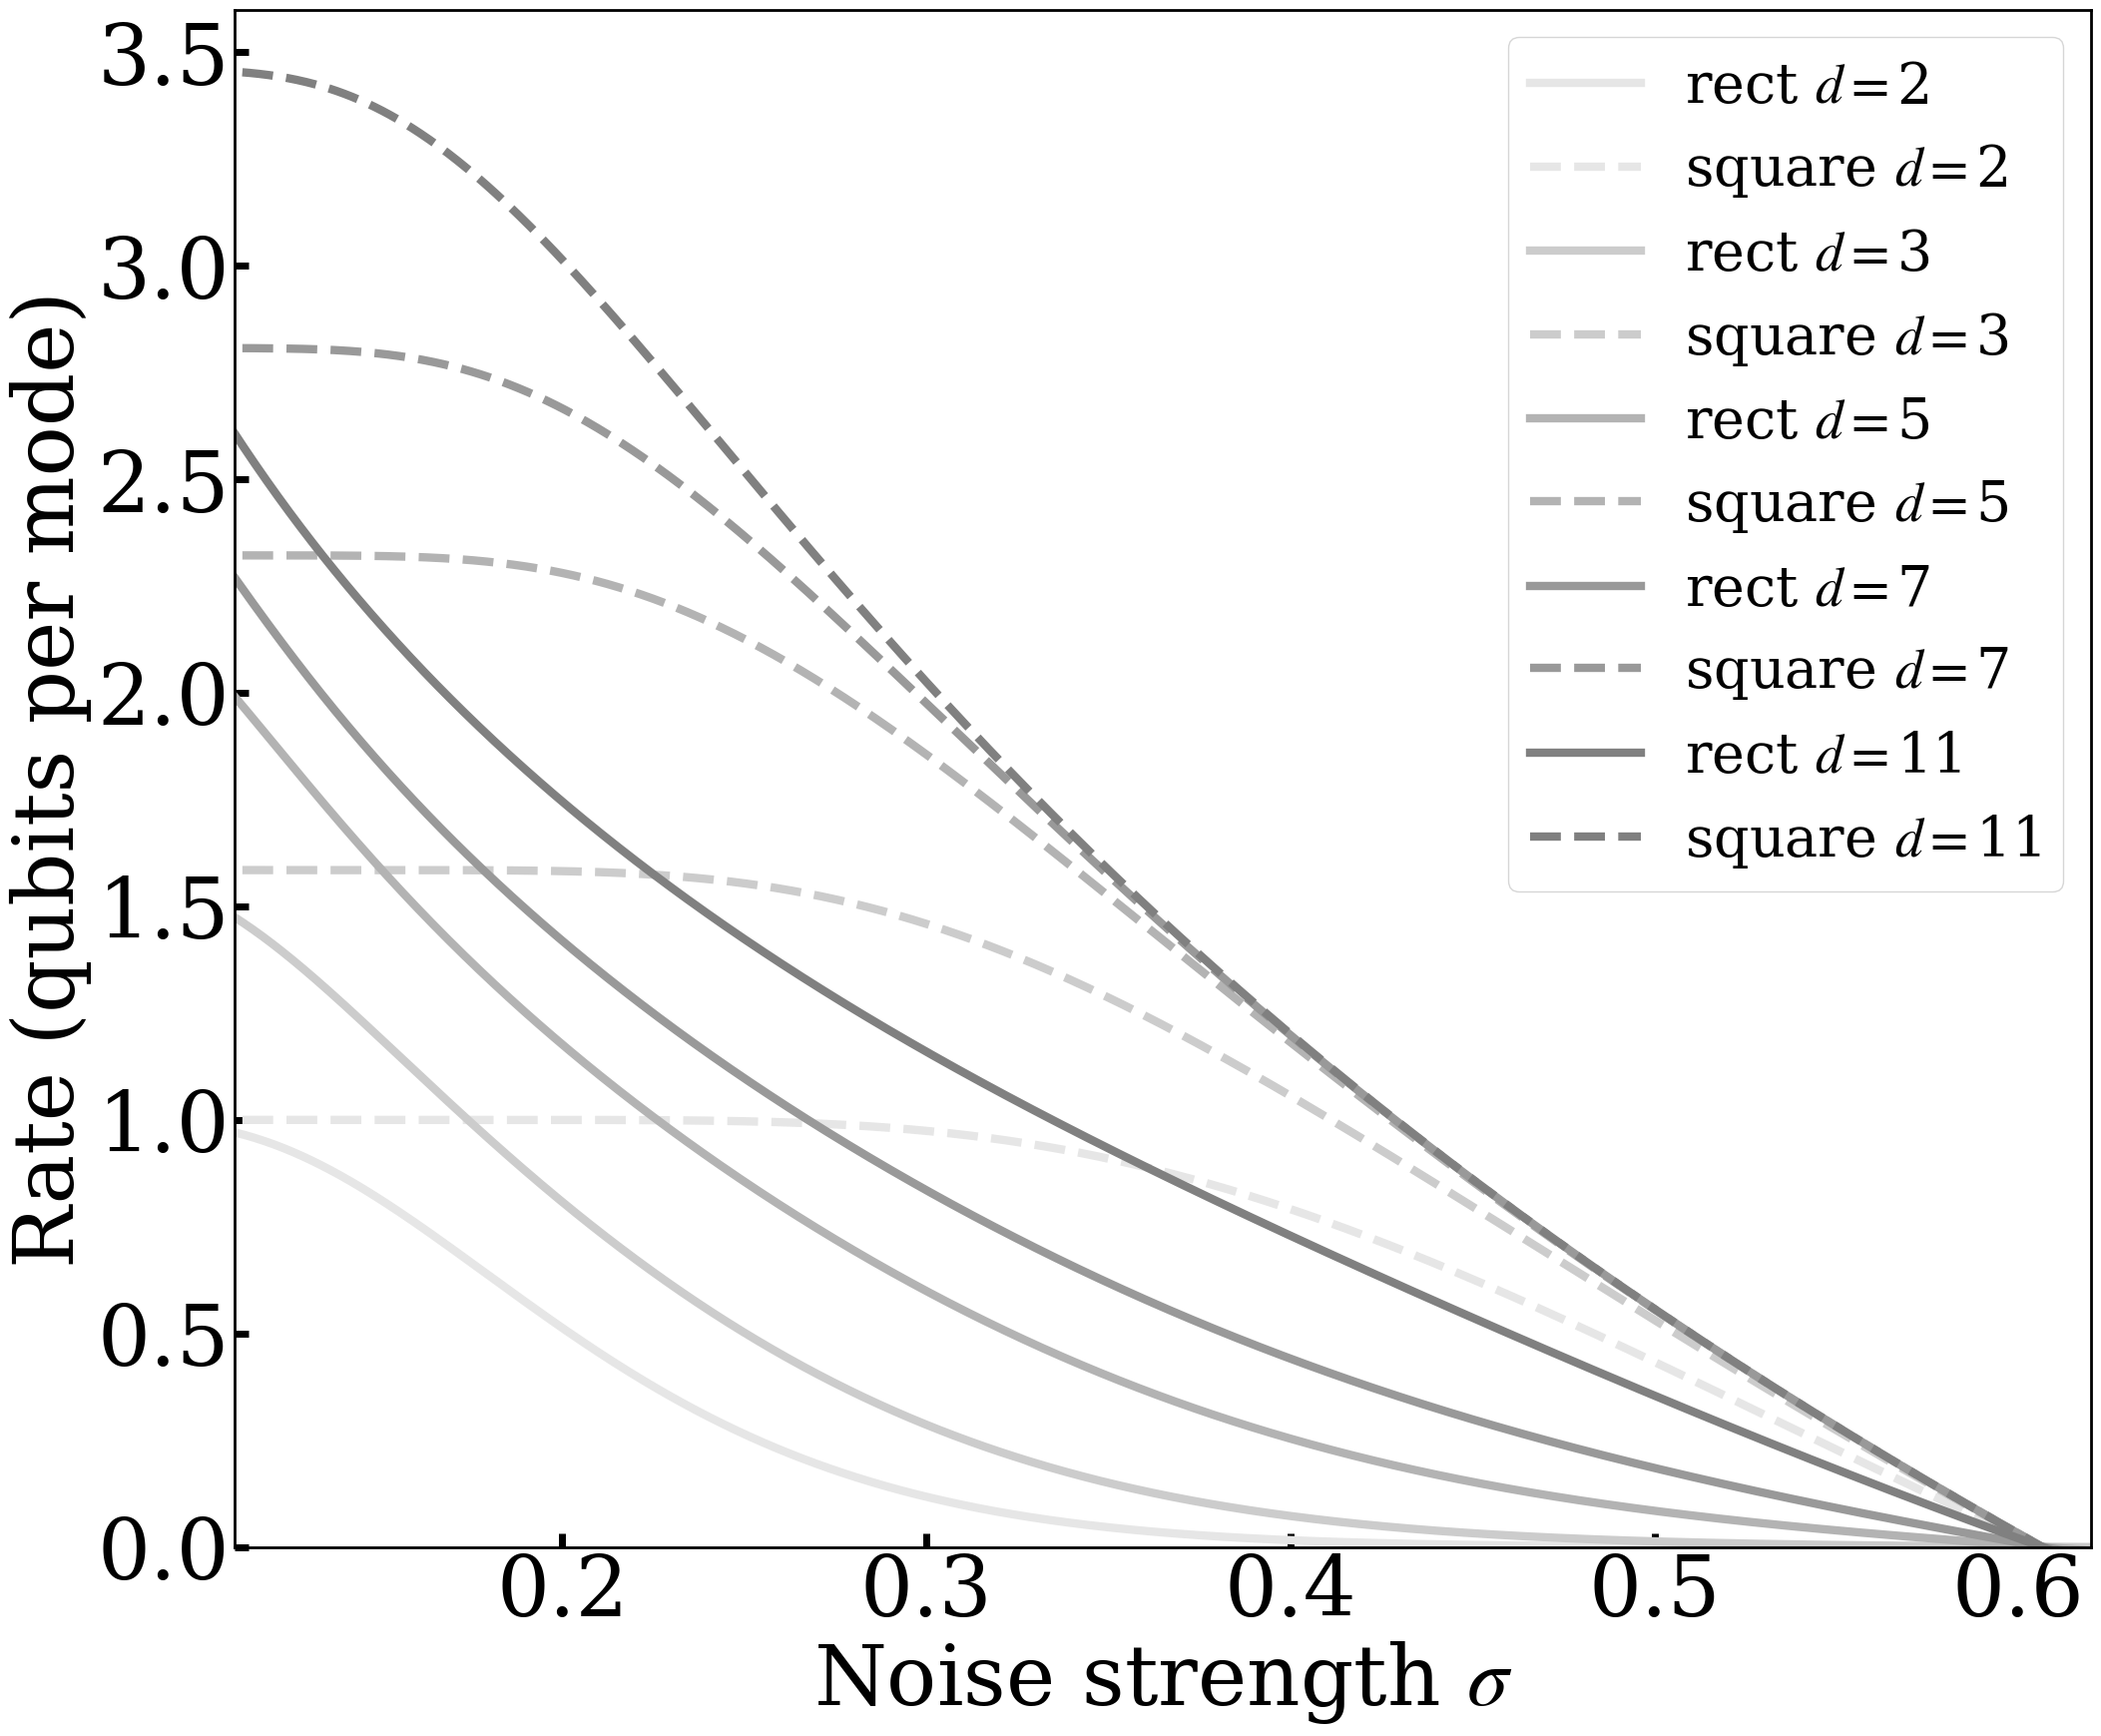

In [19]:
plt.rcParams["figure.figsize"] = (24,20)

for i in range(len(ds)-2):
    plt.plot(sig1,I_analog_rect[i],label=r'rect $d=$'+str(ds[i]),color=str(0.9-0.1*i),linewidth=6)
    plt.plot(sig1,I_analog_sq[i],label=r'square $d=$'+str(ds[i]),linestyle='dashed',color=str(0.9-0.1*i),linewidth=6)
#plt.plot(sig1,coherent_info(sig1),'k--',label='$I_c$')
#plt.plot(sig1,np.log2(np.floor(np.exp2(coherent_info(sig1)))),label='Symplectic')
#plt.yscale('log')
plt.ylabel(r'Rate (qubits per mode)',fontsize=60)
plt.xlabel(r'Noise strength $\sigma$',fontsize=60)
plt.tick_params(axis='y', direction='in',width=5,length=10)
plt.tick_params(axis='x', direction='in',width=5,length=10)
plt.legend()
plt.ylim(0,3.6)
plt.xlim(0.11,0.62)